In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("official/mnist/dataset.py", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting official/mnist/dataset.py\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting official/mnist/dataset.py\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting official/mnist/dataset.py\t10k-images-idx3-ubyte.gz
Extracting official/mnist/dataset.py\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
sample_image = mnist.train.images[100].reshape(28, 28)

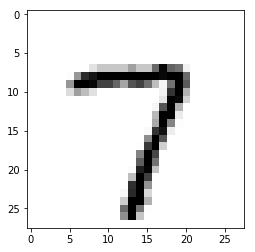

In [5]:
plt.imshow(sample_image, cmap="gist_yarg")

## The example image shows handwritten '7'
## These images are already normalised as they are grayscale images.

In [8]:
print("The min is ", round(sample_image.min()), "\nThe max is ", round(sample_image.max()))

The min is  0.0 
The max is  1.0


#### As seen above the min value is 0 and the max value is 1. Hence, the images are normalised. 

In [9]:
## Initialise weights
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [10]:
## Initialise bias
def init_bias(shape):
    init_bias_values = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_values)

In [11]:
## Create a 2D convolution function
def convTwoDim(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

In [12]:
def max_pool(x):  ## 2x2 pool function
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [13]:
def convolution_layer(x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.sigmoid(convTwoDim(x, W))

In [14]:
def fully_connected_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

## Placeholders

In [15]:
x = tf.placeholder(tf.float32, shape=[None,784])

In [16]:
y_true = tf.placeholder(tf.float32, shape=[None,10])

## Layers

In [17]:
x_image = tf.reshape(x, [-1,28,28,1])

In [18]:
##Layer 1
conv_lay_1 = convolution_layer(x_image, shape=[5,5,1,32])
conv_lay_1_pool = max_pool(conv_lay_1)

In [19]:
##Layer 2
conv_lay_2 = convolution_layer(conv_lay_1_pool, shape=[5,5,32,64])
conv_lay_2_pool = max_pool(conv_lay_2)

In [20]:
conv_2_flat = tf.reshape(conv_lay_2_pool, [-1,7*7*64])
full_layer_1 = tf.nn.sigmoid(fully_connected_layer(conv_2_flat, 1024))

In [21]:
##Drop Out
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_1, keep_prob=hold_prob)

In [22]:
y_pred = fully_connected_layer(full_one_dropout, 10)

In [23]:
## LOSS FUNCTION
cross_entropy =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_pred))

In [24]:
## Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [25]:
init = tf.global_variables_initializer()

In [27]:
saver = tf.train.Saver()

In [32]:
steps = 10001

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.Session(config=config) as sess:
    
    sess.run(init)
    
    for i in range(steps):
        batch_x, batch_y = mnist.train.next_batch(50)
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y, hold_prob:0.8})
        
        if i%1000 == 0:
            print("On step ", i)
            print("Accuracy: ")
            matches = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
            accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
            print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_true:mnist.test.labels, hold_prob:1.0}), "\n")
 

    ## Save the model checkpoint
    saver.save(sess, 'models/cnn_trainedModel-1.ckpt')

On step  0
Accuracy: 
0.1028 

On step  1000
Accuracy: 
0.9649 

On step  2000
Accuracy: 
0.9795 

On step  3000
Accuracy: 
0.9832 

On step  4000
Accuracy: 
0.9851 

On step  5000
Accuracy: 
0.9866 

On step  6000
Accuracy: 
0.9889 

On step  7000
Accuracy: 
0.9853 

On step  8000
Accuracy: 
0.9862 

On step  9000
Accuracy: 
0.9864 

On step  10000
Accuracy: 
0.9891 

